In [1]:
import numpy as np
import scipy.io
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
def loss_hesapla(thetas,X,Y):
    return np.sum(((X.dot(thetas.T)-Y)**2)/(2*X.shape[0]))

In [3]:
def loss_hesapla_reg(thetas,X,Y,reg_katsayi=0.1):
    return (np.sum(((X.dot(thetas.T)-Y)**2))+reg_katsayi*np.sum(thetas[:,1:]**2))/(2*X.shape[0])

In [4]:
def gradient_descent_reg(thetas,X,Y,reg_katsayi=0.01,lr=0.1):
    thetas -= (lr*((X.dot(thetas.T)-Y).T.dot(X)))/X.shape[0]
    thetas[:,1:] -= (reg_katsayi/X.shape[0])*(thetas[:,1:])
    return thetas

In [5]:
def polinom_feature(X,derece):
    temp = np.empty((X.shape[0],derece-1))
    for i in range(2,derece+1):
        temp[:,i-2:i-1] = X**i
    return np.concatenate([X,temp],axis=1)

In [6]:
data = scipy.io.loadmat('datas/ex5data1.mat')
x_train = data['X']
y_train = data['y']
x_val = data['Xval']
y_val = data['yval']
x_test = data['Xtest']
y_test = data['ytest']

In [7]:
rang = x_train.max() - x_train.min()
x_train = (x_train-x_train.mean())/rang

rang = x_val.max() - x_val.min()
x_val = (x_val-x_val.mean())/rang

rang = x_test.max() - x_test.min()
x_test = (x_test-x_test.mean())/rang

In [8]:
derece = 10
x_train = polinom_feature(x_train,derece)
x_val = polinom_feature(x_val,derece)
x_test = polinom_feature(x_test,derece)

In [9]:
x_train = np.concatenate([np.ones((x_train.shape[0],1)),x_train],axis=1)
x_val = np.concatenate([np.ones((x_val.shape[0],1)),x_val],axis=1)
x_test = np.concatenate([np.ones((x_test.shape[0],1)),x_test],axis=1)

### Regüralizasyon ile Lineer Regresyon için ideal reg_degerinin bulunması

In [10]:
iterasyon = 10000
loss_list = list()

In [11]:
#reg_values = [0,0.001,0.01,0.1,1,10,100,1000]
reg_values = list(np.arange(0,0.1,0.01))

In [12]:
son_losslar_train = list()
son_losslar_val = list()
for reg_value in reg_values:
    #np.random.seed(1234)
    #thetas = np.random.randn(1,x_train.shape[1])
    thetas = np.ones((1,x_train.shape[1]))
    for i in range(iterasyon):
        for j in range(x_train.shape[0]):
            thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.3,reg_katsayi=reg_value)
    son_losslar_train.append(loss_hesapla(thetas,x_train,y_train))
    son_losslar_val.append(loss_hesapla(thetas,x_val,y_val))

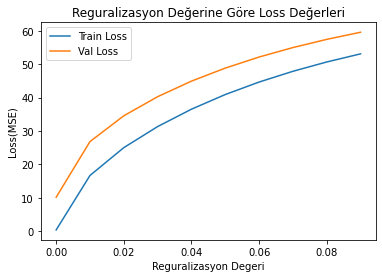

In [13]:
plt.plot(reg_values,son_losslar_train)
plt.plot(reg_values,son_losslar_val)
plt.xlabel("Reguralizasyon Degeri")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Reguralizasyon Değerine Göre Loss Değerleri")
plt.show()

In [14]:
iterasyon = 10000
train_losses = list()
val_losses = list()
thetas = np.ones((1,x_train.shape[1]))

In [15]:
for i in range(iterasyon):
    for j in range(x_train.shape[0]):
        thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.3,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))])
    train_losses.append(loss_hesapla_reg(thetas,x_train,y_train,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))]))
    val_losses.append(loss_hesapla(thetas,x_val,y_val))
    if(i%500 == 0):
        train_loss = loss_hesapla_reg(thetas,x_train,y_train,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))])
        val_loss = loss_hesapla(thetas,x_val,y_val)
        print("{0}.iterasyon, Train Loss = {1}, Val Loss = {2}".format(i,train_loss,val_loss))

0.iterasyon, Train Loss = 38.914506131899394, Val Loss = 47.21958182720523
500.iterasyon, Train Loss = 0.8598468656708512, Val Loss = 9.01196808753167
1000.iterasyon, Train Loss = 0.7889773376043022, Val Loss = 8.913039850471346
1500.iterasyon, Train Loss = 0.7290976680811788, Val Loss = 8.954740077996696
2000.iterasyon, Train Loss = 0.6766854326940813, Val Loss = 9.034978910454715
2500.iterasyon, Train Loss = 0.630912759619641, Val Loss = 9.124528761379818
3000.iterasyon, Train Loss = 0.5910006348188023, Val Loss = 9.214709101391584
3500.iterasyon, Train Loss = 0.5562059774378446, Val Loss = 9.302822783978645
4000.iterasyon, Train Loss = 0.5258629754433505, Val Loss = 9.387962783970863
4500.iterasyon, Train Loss = 0.499388373114493, Val Loss = 9.469787579878068
5000.iterasyon, Train Loss = 0.4762747118185502, Val Loss = 9.548157414184962
5500.iterasyon, Train Loss = 0.4560813295234453, Val Loss = 9.62302176402019
6000.iterasyon, Train Loss = 0.438425754235571, Val Loss = 9.69438084160

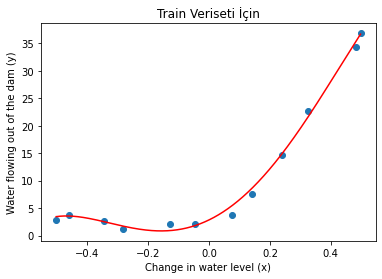

In [16]:
x_range = np.linspace(x_train[:,1].min(),x_train[:,1].max(),1000).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_train[:,1],y_train)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Train Veriseti İçin")
plt.show()

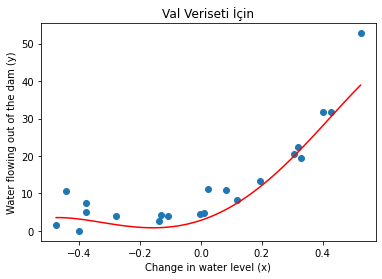

In [17]:
x_range = np.linspace(x_val[:,1].min(),x_val[:,1].max(),100).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_val[:,1],y_val)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Val Veriseti İçin")
plt.show()

### Örnek sayısının başarıma etkisi

In [18]:
iterasyon = 10000
ornek_sayilari = range(1,x_train.shape[0]+1)

In [19]:
son_losslar_train = list()
son_losslar_val = list()
for ornek_sayisi in ornek_sayilari:
    thetas = np.ones((1,x_train.shape[1]))
    for i in range(iterasyon):
        for j in range(ornek_sayisi):
            thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.31,reg_katsayi=0)
    son_losslar_train.append(loss_hesapla_reg(thetas,x_train[:ornek_sayisi],y_train[:ornek_sayisi]))
    son_losslar_val.append(loss_hesapla(thetas,x_val,y_val))

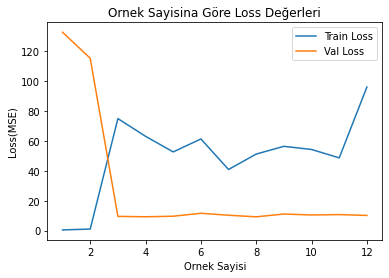

In [20]:
plt.plot(range(1,len(son_losslar_train)+1),son_losslar_train)
plt.plot(range(1,len(son_losslar_val)+1),son_losslar_val)
plt.xlabel("Ornek Sayisi")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Ornek Sayisina Göre Loss Değerleri")
plt.show()

### Normal Equation İle Polinomsal Lineer Regresyon

In [21]:
reg_values = [0,0.001,0.01,0.1,1,10,100,1000]
#reg_values = range(10)

In [22]:
son_losslar_train = list()
son_losslar_val = list()
for reg_value in reg_values:
    reg_matrix = np.eye(x_train.shape[1])
    reg_matrix[0,0] = 0.
    thetas_norm_eq = np.linalg.pinv(x_train.T.dot(x_train)+reg_matrix*reg_value).dot(x_train.T).dot(y_train)
    son_losslar_train.append(loss_hesapla_reg(thetas_norm_eq.reshape(1,-1),x_train,y_train,reg_katsayi=reg_value))
    son_losslar_val.append(loss_hesapla(thetas_norm_eq.reshape(1,-1),x_val,y_val))

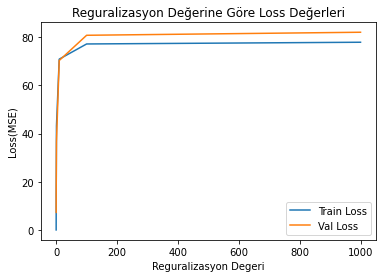

In [24]:
plt.plot(reg_values,son_losslar_train)
plt.plot(reg_values,son_losslar_val)
plt.xlabel("Reguralizasyon Degeri")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Reguralizasyon Değerine Göre Loss Değerleri")
plt.show()

In [25]:
best_reg_value_norm = reg_values[son_losslar_val.index(min(son_losslar_val))]
reg_matrix = np.eye(x_train.shape[1])
reg_matrix[0,0] = 0.
thetas_norm_eq = np.linalg.pinv(x_train.T.dot(x_train)+reg_matrix*best_reg_value_norm).dot(x_train.T).dot(y_train).reshape(1,-1)

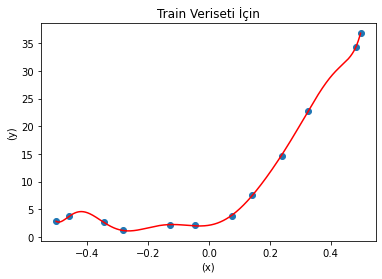

In [26]:
x_range = np.linspace(x_train[:,1].min(),x_train[:,1].max(),1000).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_train[:,1],y_train)
plt.plot(x_range,thetas_norm_eq.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("(x)")
plt.ylabel("(y)")
plt.title("Train Veriseti İçin")
plt.show()

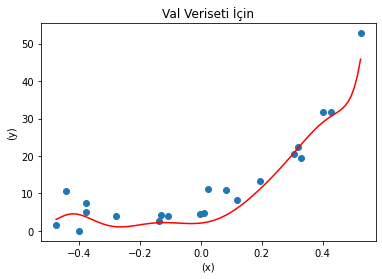

In [27]:
x_range = np.linspace(x_val[:,1].min(),x_val[:,1].max(),100).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_val[:,1],y_val)
plt.plot(x_range,thetas_norm_eq.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("(x)")
plt.ylabel("(y)")
plt.title("Val Veriseti İçin")
plt.show()

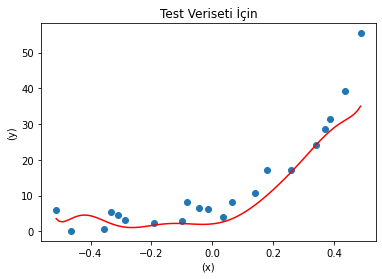

In [28]:
x_range = np.linspace(x_test[:,1].min(),x_test[:,1].max(),100).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_test[:,1],y_test)
plt.plot(x_range,thetas_norm_eq.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("(x)")
plt.ylabel("(y)")
plt.title("Test Veriseti İçin")
plt.show()